Theodoros Lambrou

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from QPGC import QPGenericConstraints

Matplotlib is building the font cache; this may take a moment.


# Constrained Optimization: Equality and Inequality Constraints

The below are necessary functions that are needed before going through the proposed experiments.

In [2]:
# dataset creation

def dataset(n_points, separable = True):
    m1 = np.array([0., 0.])
    s1 = np.array([[1., -0.9], [-0.9, 1.]])
    
    if separable:
        m2 = np.array([3., 6.])
        s2 = np.array([[1., 0.], [0., 1.]])
    else:
        m2 = np.array([1., 2.])
        s2 = np.array([[1., 0.], [0., 1.]])

    pos_class = np.random.multivariate_normal(m1, s1, n_points)
    neg_class = np.random.multivariate_normal(m2, s2, n_points)
    x = np.concatenate((pos_class, neg_class)).T
    y = np.concatenate((np.ones(n_points), -1*np.ones(n_points)))

    return x,y


# matrices creation (equation 8)

def generation_matrices(x,y,K):
    #Dimensions
    n = x.shape[1] 
    m = 2*n
    p = 1
    G = np.dot(np.dot(np.diag(y), x.T), np.dot(x, np.diag(y)))
    g = -np.ones(n)
    A = y.reshape(n, p)
    b = np.zeros(p) 
    C = np.concatenate((np.eye(n), -np.eye(n)), axis= 1)
    d = np.concatenate((np.zeros(n), -K*np.ones(n)))
    return G, g, A, b, C,d


# computing the hyperplane

def hyper(x,y,alpha, K):
    
    w = np.sum(alpha * y * x, axis=1)
    b = []
    for i in range(0,alpha.shape[0]):
      if alpha[i]>0 and alpha[i]< K: b.append(y[i]-np.dot(w.T,x[:,i]))
          
    return w, np.median(b)

## Experiment 1

Beginning with the simplest case (the case in which data is separable) and with a small dataset (2 points for each class).

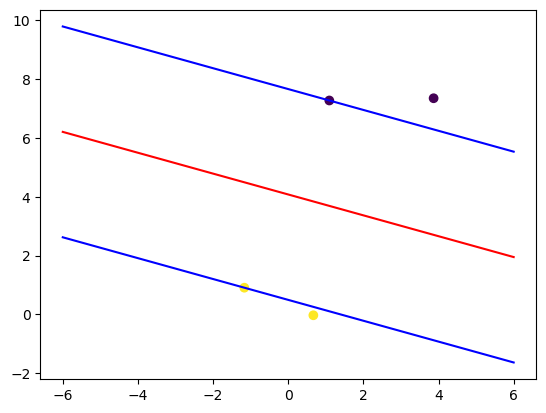

In [9]:
K = 1
X, y = dataset(2)
G, g, A, b, C, d = generation_matrices(X, y, K)

alpha = QPGenericConstraints(G, g, A, C, b, d)
w, b = hyper(X, y,alpha,K)

x = np.linspace(-6, 6, 100)

plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()

It can be seen that the set of points have been splitted correctly. 
The hyperplanes at distance −1 and 1 touch one (or more) points respectively which are known as support vectors.

## Experiment 2

Now I increase the dataset with 100 samples for each class.

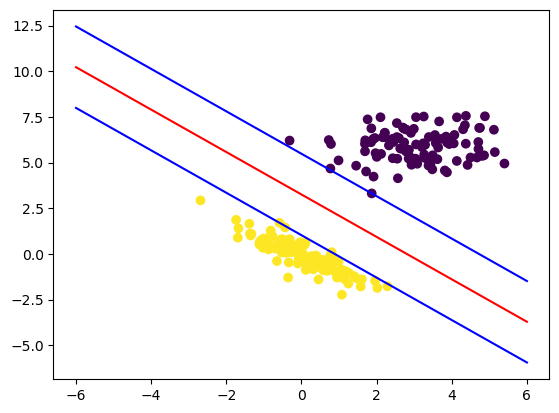

In [10]:
K = 1 
X, y = dataset(100)
G, g, A, b, C, d = generation_matrices(X, y, K)
alpha = QPGenericConstraints(G, g, A, C, b, d)
w, b = hyper(X, y,alpha,K)

x = np.linspace(-6, 6, 100)

plt.scatter(X[0,:], X[1,:],c=y)
plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
plt.plot(x, -(w[0]*x + b) / w[1], 'r')
plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
plt.show()

It can be seen that for a large dataset, the classification is still good.

## Experiment 3

I now perform several experiments with different values of $K$ and test the stability of the obtained solution.

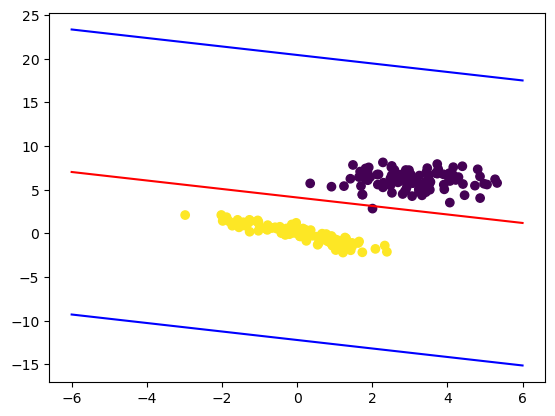

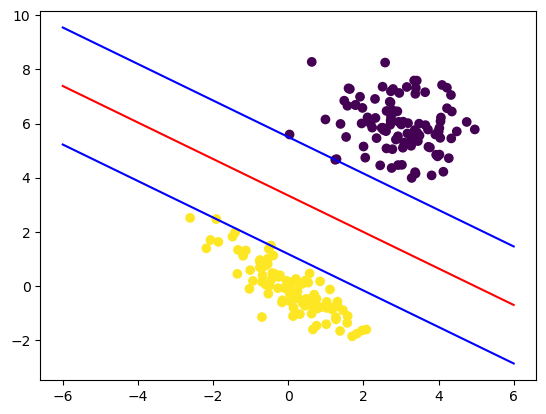

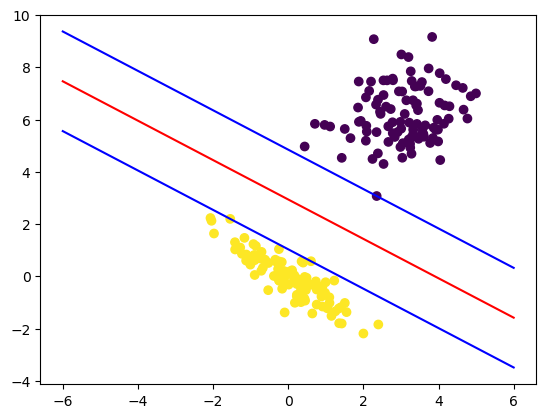

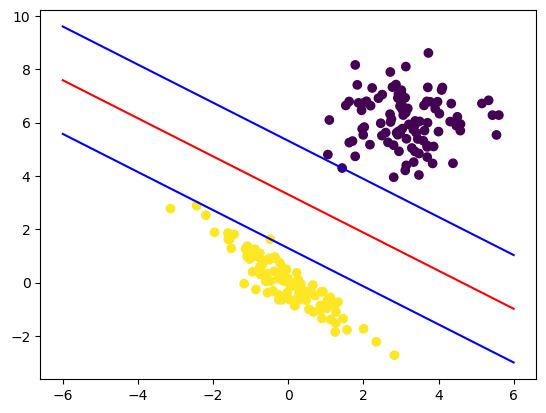

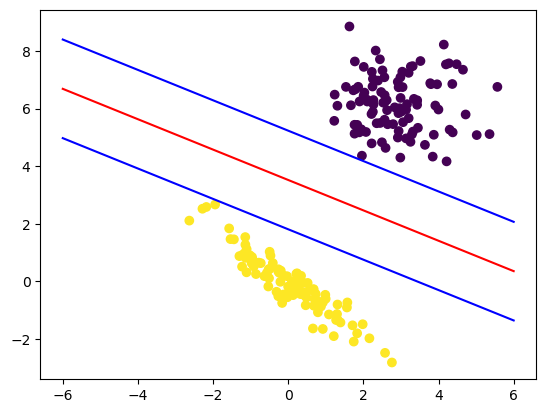

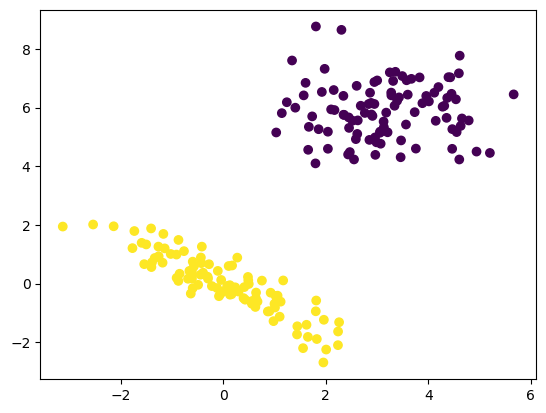

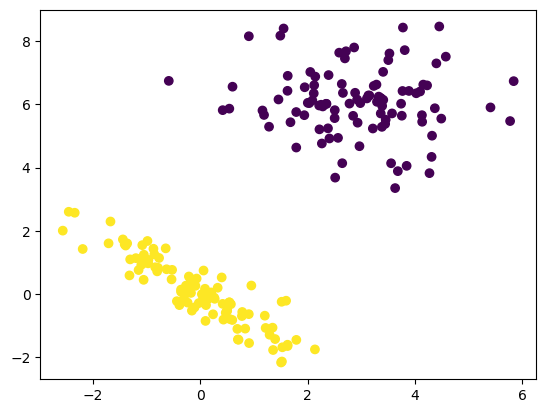

In [22]:
X, y = dataset(100)
for K in [0.0001, 1, 10, 1e4, 1e6, 1e8, 1e12]:
    X, y = dataset(100)
    G, g, A, b, C, d = generation_matrices(X, y, K)

    alpha = QPGenericConstraints(G, g, A, C, b, d)
    w, b =hyper(X, y,alpha,K)
    x = np.linspace(-6, 6, 100)

    plt.scatter(X[0,:], X[1,:],c=y)
    plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
    plt.plot(x, -(w[0]*x + b) / w[1], 'r')
    plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
    plt.show()

It can be seen that for very small values of $K$ the method does not really work. The hyperplane misclassifies a lot of points and the hyperplanes at distance 1 and -1 are not correct. 
When the value of $K$ is increased, the method starts to classify better the points, with classification being perfect when $K=1$ and $K=10$. The method shows worse performance when $K$ has a bigger value. When $K=10^{8}$ and $K=10^{12}$, the method does not seem to work (or does not converge).

## Experiment 4

Now I test the algorithm with the non-separable case using different values of $K$.

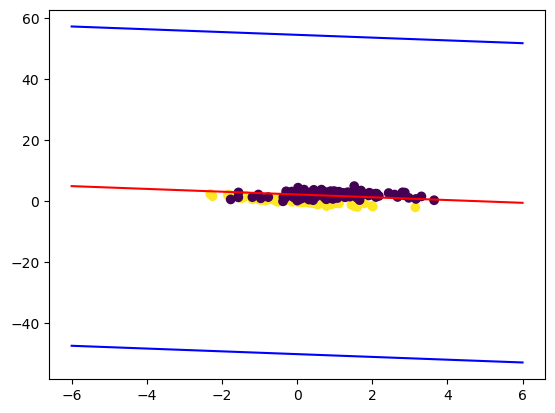

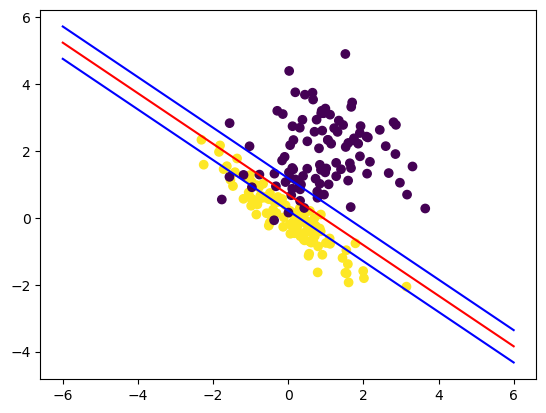

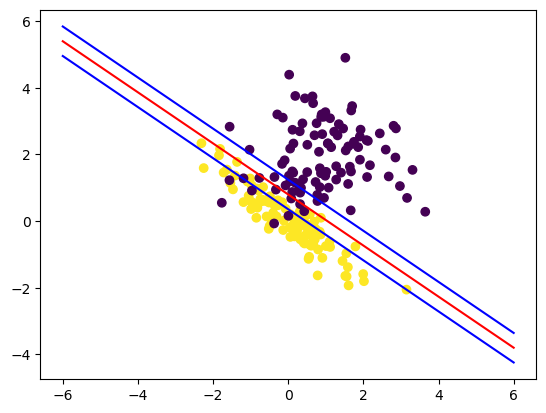

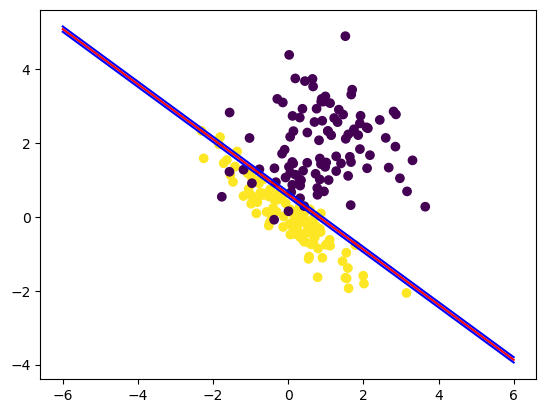

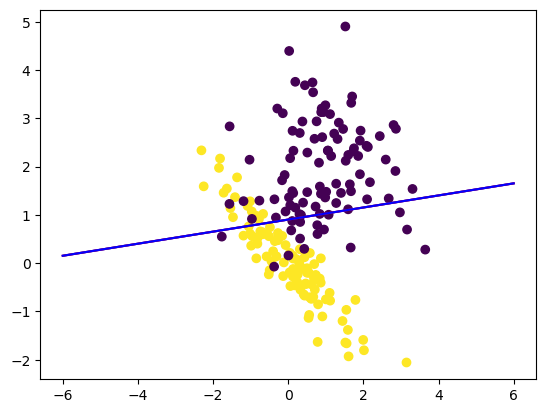

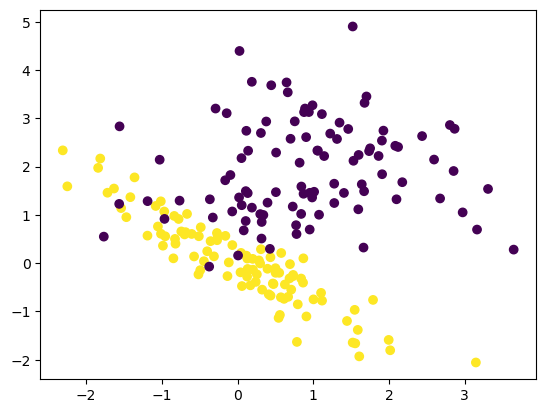

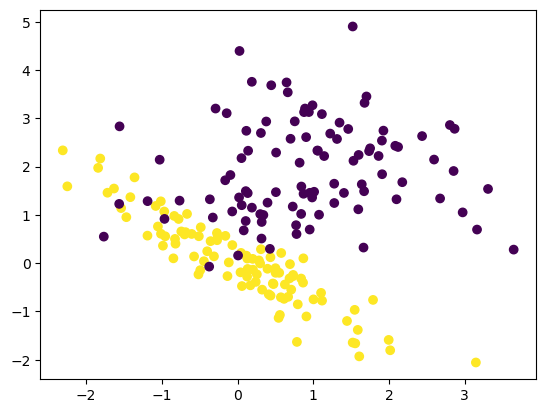

In [30]:
X, y = dataset(100, separable = False)

for K in [0.0001, 1, 10, 1e4, 1e6, 1e8, 1e12]:

    G, g, A, b, C, d = generation_matrices(X, y, K)

    alpha = QPGenericConstraints(G, g, A, C, b, d)
    w, b = hyper(X, y,alpha,K)
    x = np.linspace(-6, 6, 100)

    plt.scatter(X[0,:], X[1,:],c=y)
    plt.plot(x, -(w[0]*x + b+1) / w[1], 'b')
    plt.plot(x, -(w[0]*x + b) / w[1], 'r')
    plt.plot(x, -(w[0]*x + b-1) / w[1], 'b')
    plt.show()

Again it can be seen that for very small values of $K$, the method does not work. The hyperplane misclassifies a lot of points and the hyperplanes at distance 1 and -1 are not correct. It appears that when $K$ has bigger value, the classifciation is better. It also seems like that for bigger values of $K$, the hyperplane tries to find a better position to avoid misclassification but this is unavoidable. Similarily to experiment 3 for very big values of K, the method does not work or does not converge even.